In [163]:
# importing multiple files and starting your analysis
# Load all three CSV files

import pandas as pd
import glob

#1. Get all CSV file paths from a folder
csv_files = glob.glob("*.csv")



In [164]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 7ED7-FFAB

 Directory of C:\Users\prati\DAB July 25\python\week 9 Retail Chain Performance

10/04/2025  09:21 AM    <DIR>          .
10/04/2025  04:42 AM    <DIR>          ..
10/03/2025  10:42 AM    <DIR>          .ipynb_checkpoints
10/03/2025  10:34 AM             6,440 customers_wk9_thurs.csv
10/04/2025  09:21 AM            16,652 Discussion Q &A.docx
10/03/2025  10:34 AM             3,919 products_wk9_thurs.csv
10/03/2025  10:34 AM             5,655 sales_wk9_thurs.csv
10/04/2025  09:05 AM           126,066 week 9 Retail_Chain_Performance .ipynb
               5 File(s)        158,732 bytes
               3 Dir(s)  813,814,493,184 bytes free


In [165]:
#2. Create a dictionary of DataFrames
dataframes = {file: pd.read_csv(file) for file in csv_files}

#3. Display the first few rows of each DataFrame
for file, df in dataframes.items():
    print(f"\n--- {file} ---")
    print(df.head())


--- customers_wk9_thurs.csv ---
   customer_id first_name last_name  age state  income registration_date  \
0            1       John     Smith   34    CA   75000        2022-01-15   
1            2      Sarah   Johnson   28    NY   82000        2022-01-22   
2            3    Michael     Brown   45    TX   95000        2022-02-03   
3            4      Emily     Davis   31    FL   68000        2022-02-14   
4            5      David    Wilson   52    IL  110000        2022-02-28   

                     email  
0     john.smith@email.com  
1  sarah.johnson@email.com  
2  michael.brown@email.com  
3    emily.davis@email.com  
4   david.wilson@email.com  

--- products_wk9_thurs.csv ---
   product_id                   product_name           category  price  \
0           1  Wireless Bluetooth Headphones        Electronics  79.99   
1           2         Organic Cotton T-Shirt           Clothing  24.99   
2           3   Stainless Steel Water Bottle      Home & Garden  19.99   
3       

In [166]:
#See all keys (file names)
print(dataframes.keys())

dict_keys(['customers_wk9_thurs.csv', 'products_wk9_thurs.csv', 'sales_wk9_thurs.csv'])


In [167]:
#After you check the file names with print(dataframes.keys()), you can rename each DataFrame to an easier variable name. This way you don’t have to type the full file name every time.

# Rename each DataFrame to an easier variable name

customers_df = dataframes["customers_wk9_thurs.csv"]
products_df = dataframes['products_wk9_thurs.csv']
sales_df = dataframes['sales_wk9_thurs.csv']


# check first rows to make sure everything loaded correctly

print(customers_df.head())
print(products_df.head())
print(sales_df.head())





   customer_id first_name last_name  age state  income registration_date  \
0            1       John     Smith   34    CA   75000        2022-01-15   
1            2      Sarah   Johnson   28    NY   82000        2022-01-22   
2            3    Michael     Brown   45    TX   95000        2022-02-03   
3            4      Emily     Davis   31    FL   68000        2022-02-14   
4            5      David    Wilson   52    IL  110000        2022-02-28   

                     email  
0     john.smith@email.com  
1  sarah.johnson@email.com  
2  michael.brown@email.com  
3    emily.davis@email.com  
4   david.wilson@email.com  
   product_id                   product_name           category  price  \
0           1  Wireless Bluetooth Headphones        Electronics  79.99   
1           2         Organic Cotton T-Shirt           Clothing  24.99   
2           3   Stainless Steel Water Bottle      Home & Garden  19.99   
3           4          Leather Crossbody Bag        Accessories  89.99   

In [168]:
customers_df.info() # shows structure of the table
customers_df.describe() # summary statistics
customers_df.isnull().sum() # missing values per column
customers_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    int64 
 1   first_name         100 non-null    object
 2   last_name          100 non-null    object
 3   age                100 non-null    int64 
 4   state              100 non-null    object
 5   income             100 non-null    int64 
 6   registration_date  100 non-null    object
 7   email              100 non-null    object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


(100, 8)

In [169]:
# 1. convert date columns to proper DateTime format using pd.to_datetime()

import numpy as np

#in customers table
customers_df['registration_date'] = pd.to_datetime(customers_df['registration_date'])
customers_df

,customer_id,first_name,last_name,age,state,income,registration_date,email
0,1,John,Smith,34,CA,75000,2022-01-15,john.smith@email.com
1,2,Sarah,Johnson,28,NY,82000,2022-01-22,sarah.johnson@email.com
2,3,Michael,Brown,45,TX,95000,2022-02-03,michael.brown@email.com
3,4,Emily,Davis,31,FL,68000,2022-02-14,emily.davis@email.com
4,5,David,Wilson,52,IL,110000,2022-02-28,david.wilson@email.com
...,...,...,...,...,...,...,...,...
95,96,Alice,Wallace,28,CA,69000,2023-12-08,alice.wallace@email.com
96,97,Henry,Woods,47,NY,98000,2023-12-15,henry.woods@email.com
97,98,Barbara,Cole,34,TX,79000,2023-12-22,barbara.cole@email.com
98,99,Walter,West,40,FL,87000,2023-12-29,walter.west@email.com


In [170]:
#in products table
products_df['launch_date'] = pd.to_datetime(products_df['launch_date'])
products_df

,product_id,product_name,category,price,launch_date,brand
0,1,Wireless Bluetooth Headphones,Electronics,79.99,2021-03-15,AudioTech
1,2,Organic Cotton T-Shirt,Clothing,24.99,2021-04-20,EcoWear
2,3,Stainless Steel Water Bottle,Home & Garden,19.99,2021-05-10,HydroLife
3,4,Leather Crossbody Bag,Accessories,89.99,2021-06-01,StyleCraft
4,5,Yoga Mat Premium,Sports & Outdoors,34.99,2021-06-15,FitZone
5,6,Smart Fitness Tracker,Electronics,149.99,2021-07-08,TechFit
6,7,Ceramic Coffee Mug Set,Home & Garden,29.99,2021-07-22,KitchenPro
7,8,Denim Jacket Classic,Clothing,69.99,2021-08-05,UrbanStyle
8,9,Wireless Phone Charger,Electronics,39.99,2021-08-18,PowerTech
9,10,Silk Scarf Designer,Accessories,54.99,2021-09-02,LuxeFashion


In [171]:
#in sales table
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date'])
sales_df

,sale_id,customer_id,product_id,transaction_date,quantity,total_amount
0,1,1,1,2022-02-10 14:30:00,1,79.99
1,2,2,3,2022-02-15 10:15:00,2,39.98
2,3,3,5,2022-02-20 16:45:00,1,34.99
3,4,4,2,2022-02-25 11:20:00,3,74.97
4,5,5,4,2022-03-01 13:10:00,1,89.99
...,...,...,...,...,...,...
145,146,86,30,2024-02-15 15:20:00,1,34.99
146,147,87,32,2024-02-20 11:30:00,3,83.97
147,148,88,34,2024-02-25 13:45:00,2,109.98
148,149,89,36,2024-03-01 16:15:00,1,29.99


In [172]:
# Extract useful components from the sales transaction dates: year, month, and day of week


sales_df['year'] = sales_df['transaction_date'].dt.year
sales_df['month'] = sales_df['transaction_date'].dt.month # extract month (1-12)
sales_df['month name'] = sales_df['transaction_date'].dt.month_name() # extract full month name
sales_df['day of the week'] = sales_df['transaction_date'].dt.day_name()
sales_df

,sale_id,customer_id,product_id,transaction_date,quantity,total_amount,year,month,month name,day of the week
0,1,1,1,2022-02-10 14:30:00,1,79.99,2022,2,February,Thursday
1,2,2,3,2022-02-15 10:15:00,2,39.98,2022,2,February,Tuesday
2,3,3,5,2022-02-20 16:45:00,1,34.99,2022,2,February,Sunday
3,4,4,2,2022-02-25 11:20:00,3,74.97,2022,2,February,Friday
4,5,5,4,2022-03-01 13:10:00,1,89.99,2022,3,March,Tuesday
...,...,...,...,...,...,...,...,...,...,...
145,146,86,30,2024-02-15 15:20:00,1,34.99,2024,2,February,Thursday
146,147,87,32,2024-02-20 11:30:00,3,83.97,2024,2,February,Tuesday
147,148,88,34,2024-02-25 13:45:00,2,109.98,2024,2,February,Sunday
148,149,89,36,2024-03-01 16:15:00,1,29.99,2024,3,March,Friday


In [173]:
# Display the date range covered by your sales data (earliest and latest dates)

earliest_date = df["transaction_date"].min()
latest_date = df["transaction_date"].max()

In [174]:
# 2. Basic Time Analysis:
# Find the busiest day of the week for sales (by counting transactions)

# Count transactions by day
day_counts = sales_df["day of the week"].value_counts()


# Find busiest day
busiest_day = day_counts.idxmax()
maximum_count = day_counts.max()

print("Transaction counts by day of week:\n", day_counts)
print(f"\nBusiest day is {busiest_day} with {maximum_count} transactions")


# Finding busiest day(s) using mode(). this counts all busiest days of the week

busiest_days = sales_df["day of the week"].mode().tolist()

print("Busiest day(s):", busiest_days)

print(f"\nBusiest day(s) is/are {busiest_day} with {maximum_count} transactions")

Transaction counts by day of week:
 day of the week
Friday       24
Tuesday      22
Thursday     21
Sunday       21
Saturday     21
Wednesday    21
Monday       20
Name: count, dtype: int64

Busiest day is Friday with 24 transactions
Busiest day(s): ['Friday']

Busiest day(s) is/are Friday with 24 transactions


In [175]:
# Determine which month had the most transactions

# Count transactions by month
month_counts = sales_df["month name"].value_counts()


# Find busiest month
busiest_month = month_counts.idxmax()
maximum_count = month_counts.max()

print("Transaction counts by month:\n", month_counts)
print(f"\nBusiest month is {busiest_month} with {maximum_count} transactions")

Transaction counts by month:
 month name
February     16
March        14
December     14
April        12
May          12
June         12
August       12
July         12
September    12
October      12
November     12
January      10
Name: count, dtype: int64

Busiest month is February with 16 transactions


<Axes: title={'center': 'Monthly transactions'}, xlabel='month name'>

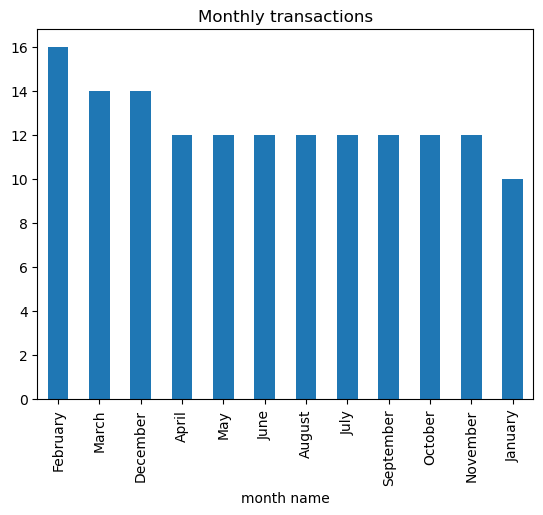

In [176]:
#plotting a graph

sales_df["month name"].value_counts().plot(kind="bar", title="Monthly transactions")



#### I am not sure how to plot in calendar order???


In [177]:
# # Count how many sales happened in each year

year_counts = sales_df["year"].value_counts()


# Find busiest year
busiest_year = year_counts.idxmax()
maximum_count = year_counts.max()

print("Transaction counts by year:\n", year_counts)
print(f"\nBusiest year is {busiest_year} with {maximum_count} transactions")


Transaction counts by year:
 year
2023    72
2022    65
2024    13
Name: count, dtype: int64

Busiest year is 2023 with 72 transactions


In [178]:
products_df.head()

,product_id,product_name,category,price,launch_date,brand
0,1,Wireless Bluetooth Headphones,Electronics,79.99,2021-03-15,AudioTech
1,2,Organic Cotton T-Shirt,Clothing,24.99,2021-04-20,EcoWear
2,3,Stainless Steel Water Bottle,Home & Garden,19.99,2021-05-10,HydroLife
3,4,Leather Crossbody Bag,Accessories,89.99,2021-06-01,StyleCraft
4,5,Yoga Mat Premium,Sports & Outdoors,34.99,2021-06-15,FitZone


In [179]:
## Part 2: GroupBy and Aggregation
#Product Analysis:
#Group products by category and calculate the average price for each category


average_price_by_category = products_df.groupby('category')['price'].mean()
print(f"\nAverage price by category is:")
print(average_price_by_category)



Average price by category is:
category
Accessories           35.073333
Clothing              52.240000
Electronics           59.990000
Home & Garden         30.156667
Sports & Outdoors    105.899091
Name: price, dtype: float64


In [180]:
#Count how many products are in each category

product_count = products_df['category'].value_counts()
print("Number of products / category")
print(product_count)


Number of products / category
category
Electronics          13
Clothing             12
Home & Garden        12
Accessories          12
Sports & Outdoors    11
Name: count, dtype: int64


In [181]:
customers_df.head()

,customer_id,first_name,last_name,age,state,income,registration_date,email
0,1,John,Smith,34,CA,75000,2022-01-15,john.smith@email.com
1,2,Sarah,Johnson,28,NY,82000,2022-01-22,sarah.johnson@email.com
2,3,Michael,Brown,45,TX,95000,2022-02-03,michael.brown@email.com
3,4,Emily,Davis,31,FL,68000,2022-02-14,emily.davis@email.com
4,5,David,Wilson,52,IL,110000,2022-02-28,david.wilson@email.com


In [182]:
#Customer Analysis:
#Group customers by state and find the average age in each state

number_of_customers_by_state = customers_df.groupby('state')['age'].mean()
print(f"\nAverage age of Customers in:")
print(number_of_customers_by_state)



Average age of Customers in:
state
CA    34.10
FL    39.00
IL    37.25
NY    36.50
TX    38.30
Name: age, dtype: float64


In [183]:
sales_df.head()

,sale_id,customer_id,product_id,transaction_date,quantity,total_amount,year,month,month name,day of the week
0,1,1,1,2022-02-10 14:30:00,1,79.99,2022,2,February,Thursday
1,2,2,3,2022-02-15 10:15:00,2,39.98,2022,2,February,Tuesday
2,3,3,5,2022-02-20 16:45:00,1,34.99,2022,2,February,Sunday
3,4,4,2,2022-02-25 11:20:00,3,74.97,2022,2,February,Friday
4,5,5,4,2022-03-01 13:10:00,1,89.99,2022,3,March,Tuesday


In [184]:
#Calculate total spending per customer (sum up all their purchases)

total_spendings = sales_df.groupby('customer_id')['total_amount'].sum()
print(f"\nTotal spending per customer:")
print(total_spendings)


Total spending per customer:
customer_id
1     229.98
2     179.96
3     154.98
4     234.95
5     149.98
       ...  
86     34.99
87     83.97
88    109.98
89     29.99
90    139.96
Name: total_amount, Length: 90, dtype: float64


In [185]:
# Find customers who have made the most purchases

customer_transaction = (
    sales_df.groupby('customer_id')['sale_id'].count()
    .reset_index(name= 'transactions')
    .sort_values(by = 'transactions', ascending= False)
)
print('Customers with most purchases')
print(customer_transaction.head())

Customers with most purchases
   customer_id  transactions
0            1             2
1            2             2
2            3             2
3            4             2
4            5             2


In [186]:
# 3. Sales Analysis:
#Calculate total sales revenue by month

total_sales = sales_df.groupby('month name')['total_amount'].sum()
print(total_sales)


month name
April         924.77
August        870.74
December     1458.71
February     1669.66
January       864.79
July          930.80
June          986.68
March        1115.77
May          1177.79
November     1022.76
October      1235.80
September    1150.76
Name: total_amount, dtype: float64


In [187]:
sales_df.head()

,sale_id,customer_id,product_id,transaction_date,quantity,total_amount,year,month,month name,day of the week
0,1,1,1,2022-02-10 14:30:00,1,79.99,2022,2,February,Thursday
1,2,2,3,2022-02-15 10:15:00,2,39.98,2022,2,February,Tuesday
2,3,3,5,2022-02-20 16:45:00,1,34.99,2022,2,February,Sunday
3,4,4,2,2022-02-25 11:20:00,3,74.97,2022,2,February,Friday
4,5,5,4,2022-03-01 13:10:00,1,89.99,2022,3,March,Tuesday


In [188]:
#Find the average transaction amount by day of the week
average_amount= sales_df.groupby('day of the week')['total_amount'].mean()

print('average transaction amount in dollars')
print(average_amount)

average transaction amount in dollars
day of the week
Friday       100.940833
Monday        90.927500
Saturday      61.121905
Sunday        99.551429
Thursday     102.267619
Tuesday       74.028636
Wednesday     96.071905
Name: total_amount, dtype: float64


In [189]:
products_df.head()

,product_id,product_name,category,price,launch_date,brand
0,1,Wireless Bluetooth Headphones,Electronics,79.99,2021-03-15,AudioTech
1,2,Organic Cotton T-Shirt,Clothing,24.99,2021-04-20,EcoWear
2,3,Stainless Steel Water Bottle,Home & Garden,19.99,2021-05-10,HydroLife
3,4,Leather Crossbody Bag,Accessories,89.99,2021-06-01,StyleCraft
4,5,Yoga Mat Premium,Sports & Outdoors,34.99,2021-06-15,FitZone


In [190]:
#Determine which product category generates the most total revenue

product_sales = sales_df.merge(products_df, on = 'product_id', how = 'left')
revenue_by_category = product_sales.groupby('category')['total_amount'].sum().sort_values(ascending=False)
print(revenue_by_category)

category
Sports & Outdoors    3544.64
Electronics          3524.29
Clothing             2745.39
Accessories          2053.25
Home & Garden        1541.46
Name: total_amount, dtype: float64


In [191]:
customers_df.head()

,customer_id,first_name,last_name,age,state,income,registration_date,email
0,1,John,Smith,34,CA,75000,2022-01-15,john.smith@email.com
1,2,Sarah,Johnson,28,NY,82000,2022-01-22,sarah.johnson@email.com
2,3,Michael,Brown,45,TX,95000,2022-02-03,michael.brown@email.com
3,4,Emily,Davis,31,FL,68000,2022-02-14,emily.davis@email.com
4,5,David,Wilson,52,IL,110000,2022-02-28,david.wilson@email.com


In [192]:
#### Part 3: Basic Data Insights
#Simple Comparisons:
#Find which state has the most customers

customer_per_state = customers_df['state'].value_counts()
maximum_customers_per_state = (
    customers_df.groupby('state')['customer_id'].count()
    .reset_index(name= 'total_customers')
    .sort_values(by = 'total_customers', ascending= False)
)

print('Number of customers/state:')
print(maximum_customers_per_state)


Number of customers/state:
  state  total_customers
0    CA               20
1    FL               20
2    IL               20
3    NY               20
4    TX               20


In [193]:
# Identify the top 5 customers by total spending

Total_spending = sales_df.groupby('customer_id')['total_amount'].sum()
Top_5_customers = Total_spending.sort_values(ascending = False).head(5)
print(Top_5_customers)

customer_id
31    379.97
13    359.96
41    329.98
84    319.98
30    284.98
Name: total_amount, dtype: float64


In [194]:
# Determine which day of the week has the highest average transaction value

avg_transaction = sales_df.groupby('day of the week')['total_amount'].mean().sort_values(ascending = False)

best_day = avg_transaction.idxmax()

max_value = avg_transaction.max()

print(avg_transaction)


day of the week
Thursday     102.267619
Friday       100.940833
Sunday        99.551429
Wednesday     96.071905
Monday        90.927500
Tuesday       74.028636
Saturday      61.121905
Name: total_amount, dtype: float64
